In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('airline-passengers.csv', index_col='Month', parse_dates=True)
df.index.freq = 'MS'

In [6]:
df.shape

(144, 1)

In [7]:
df.columns

Index(['Passengers'], dtype='object')

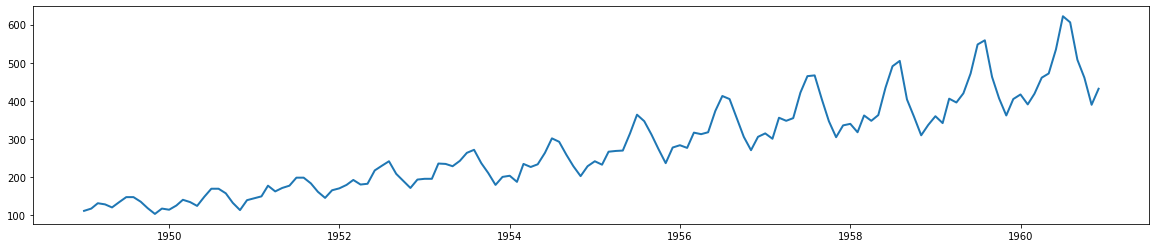

In [9]:
plt.figure(figsize=(20, 4))
plt.plot(df.Passengers, linewidth=2)
plt.show()

In [10]:
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [11]:
df.tail()

,Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [12]:
nobs = 12
df_train = df.iloc[:-nobs]
df_test = df.iloc[-nobs:]

In [13]:
df_train.shape

(132, 1)

In [14]:
df_test.shape

(12, 1)

In [17]:
df.head(4)

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129


In [18]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [30]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
scaler = MinMaxScaler()
scaler.fit(df_train)
scaled_train = scaler.transform(df_train)
scaled_test = scaler.transform(df_test)

In [40]:
n_inputs = 12
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length = n_inputs, batch_size =1)

In [41]:
for i in range(len(generator)):
    X, y = generator[i]
    print(f' \n {X.flatten()} and {y}')

 

 [0.01758242 0.03076923 0.06153846 0.05494505 0.03736264 0.06813187

 0.0967033  0.0967033  0.07032967 0.03296703 0.         0.03076923] and [[0.02417582]]

 

 [0.03076923 0.06153846 0.05494505 0.03736264 0.06813187 0.0967033

 0.0967033  0.07032967 0.03296703 0.         0.03076923 0.02417582] and [[0.04835165]]

 

 [0.06153846 0.05494505 0.03736264 0.06813187 0.0967033  0.0967033

 0.07032967 0.03296703 0.         0.03076923 0.02417582 0.04835165] and [[0.08131868]]

 

 [0.05494505 0.03736264 0.06813187 0.0967033  0.0967033  0.07032967

 0.03296703 0.         0.03076923 0.02417582 0.04835165 0.08131868] and [[0.06813187]]

 

 [0.03736264 0.06813187 0.0967033  0.0967033  0.07032967 0.03296703

 0.         0.03076923 0.02417582 0.04835165 0.08131868 0.06813187] and [[0.04615385]]

 

 [0.06813187 0.0967033  0.0967033  0.07032967 0.03296703 0.

 0.03076923 0.02417582 0.04835165 0.08131868 0.06813187 0.04615385] and [[0.0989011]]

 

 [0.0967033  0.0967033  0.07032967 0.03296703 0.

In [42]:
X.shape

(1, 12, 1)

In [44]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [94]:
model = Sequential()
model.add(LSTM(200, activation='relu', input_shape = (n_inputs, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [95]:
model.summary()

Model: "sequential_1"

_________________________________________________________________

 Layer (type)                Output Shape              Param #   


 lstm_1 (LSTM)               (None, 200)               161600    

                                                                 

 dense_1 (Dense)             (None, 1)                 201       

                                                                 


Total params: 161,801

Trainable params: 161,801

Non-trainable params: 0

_________________________________________________________________


In [96]:
model.fit(generator, epochs = 50)

Epoch 1/50

120/120 [==============================] - 2s 5ms/step - loss: 0.0255

Epoch 2/50

120/120 [==============================] - 1s 6ms/step - loss: 0.0133

Epoch 3/50

120/120 [==============================] - 1s 6ms/step - loss: 0.0122

Epoch 4/50

120/120 [==============================] - 1s 6ms/step - loss: 0.0110

Epoch 5/50

120/120 [==============================] - 1s 6ms/step - loss: 0.0091

Epoch 6/50

120/120 [==============================] - 1s 6ms/step - loss: 0.0084

Epoch 7/50

120/120 [==============================] - 1s 6ms/step - loss: 0.0053

Epoch 8/50

120/120 [==============================] - 1s 6ms/step - loss: 0.0056

Epoch 9/50

120/120 [==============================] - 1s 5ms/step - loss: 0.0047

Epoch 10/50

120/120 [==============================] - 1s 6ms/step - loss: 0.0061

Epoch 11/50

120/120 [==============================] - 1s 6ms/step - loss: 0.0038

Epoch 12/50

120/120 [==============================] - 1s 5ms/step - loss: 0.0039

E

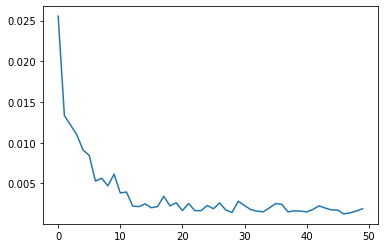

In [97]:
plt.plot(model.history.history['loss'])

In [98]:
last_train_batch = scaled_train[-12:]

In [99]:
last_train_batch = last_train_batch.reshape(1, 12, 1)

In [100]:
last_train_batch

array([[[0.56263736],
        [0.52307692],
        [0.66373626],
        [0.64175824],
        [0.69450549],
        [0.80879121],
        [0.97582418],
        [1.        ],
        [0.78901099],
        [0.66593407],
        [0.56703297],
        [0.66153846]]])

In [101]:
model.predict(last_train_batch)

array([[0.5902178]], dtype=float32)

In [102]:
scaled_test[0]

array([0.68791209])

In [103]:
y_pred = []

first_batch = scaled_train[-n_inputs:]
current_batch = first_batch.reshape(1, n_inputs, n_features)

for i in range(len(scaled_test)):
    batch = current_batch
    pred = model.predict(batch)[0]
    y_pred.append(pred)
    current_batch = np.append(current_batch[:,1:, :], [[pred]], axis = 1)
    

In [104]:
y_pred

[array([0.5902178], dtype=float32),
 array([0.5764452], dtype=float32),
 array([0.65337545], dtype=float32),
 array([0.66987526], dtype=float32),
 array([0.73894995], dtype=float32),
 array([0.8778765], dtype=float32),
 array([1.0425128], dtype=float32),
 array([1.0776109], dtype=float32),
 array([0.8929499], dtype=float32),
 array([0.72978926], dtype=float32),
 array([0.6422955], dtype=float32),
 array([0.659876], dtype=float32)]

In [105]:
scaled_test

array([[0.68791209],
       [0.63076923],
       [0.69230769],
       [0.78461538],
       [0.80879121],
       [0.94725275],
       [1.13846154],
       [1.1032967 ],
       [0.88791209],
       [0.78461538],
       [0.62857143],
       [0.72087912]])

In [106]:
df_test

,Passengers,Predictions
Month,,
1960-01-01,417,367
1960-02-01,391,359
1960-03-01,419,375
1960-04-01,461,387
1960-05-01,472,422
1960-06-01,535,480
1960-07-01,622,542
1960-08-01,606,553
1960-09-01,508,493


In [107]:
y_pred_transformed = scaler.inverse_transform(y_pred)

In [108]:
y_pred_transformed = np.round(y_pred_transformed,0)

In [109]:
y_pred_final = y_pred_transformed.astype(int)

In [110]:
y_pred_final

array([[373],
       [366],
       [401],
       [409],
       [440],
       [503],
       [578],
       [594],
       [510],
       [436],
       [396],
       [404]])

In [111]:
df_test.values, y_pred_final

(array([[417, 367],
        [391, 359],
        [419, 375],
        [461, 387],
        [472, 422],
        [535, 480],
        [622, 542],
        [606, 553],
        [508, 493],
        [461, 420],
        [390, 391],
        [432, 386]], dtype=int64),
 array([[373],
        [366],
        [401],
        [409],
        [440],
        [503],
        [578],
        [594],
        [510],
        [436],
        [396],
        [404]]))

In [112]:
df_test['Predictions'] = y_pred_final

C:\Users\vishn\AppData\Local\Temp/ipykernel_9564/2173202408.py:1: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_test['Predictions'] = y_pred_final


In [113]:
df_test

,Passengers,Predictions
Month,,
1960-01-01,417,373
1960-02-01,391,366
1960-03-01,419,401
1960-04-01,461,409
1960-05-01,472,440
1960-06-01,535,503
1960-07-01,622,578
1960-08-01,606,594
1960-09-01,508,510


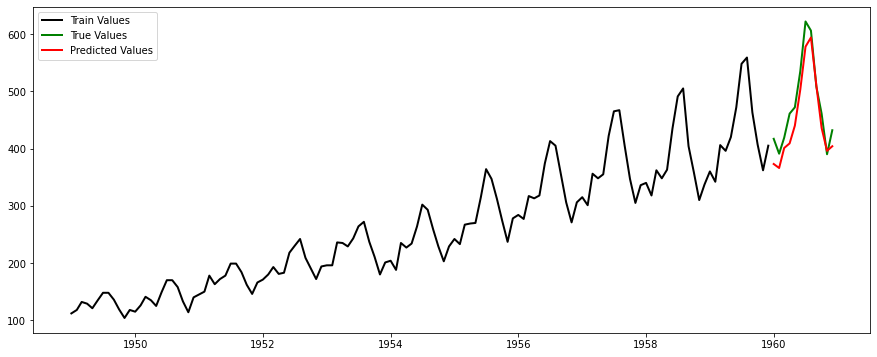

In [114]:
plt.figure(figsize=(15, 6))
plt.plot(df_train.index, df_train.Passengers, linewidth=2, color='black', label='Train Values')
plt.plot(df_test.index, df_test.Passengers, linewidth=2, color='green', label='True Values')
plt.plot(df_test.index, df_test.Predictions, linewidth=2, color='red', label='Predicted Values')
plt.legend()
plt.show()

In [115]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [116]:
sqrt(mean_squared_error(df_test.Passengers, df_test.Predictions))

30.504098085339287